In [150]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [1]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gdf = pd.read_csv('regssdatacsv.csv')

In [4]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [5]:
SASdf = gdf[gdf.Tm == 'SAS']
MEMdf = gdf[gdf.Tm == 'MEM']


In [6]:
SASdf.Date = SASdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
SASdf = SASdf[(SASdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (SASdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

MEMdf.Date = MEMdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
MEMdf = MEMdf[(MEMdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (MEMdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


C:\Users\Home\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

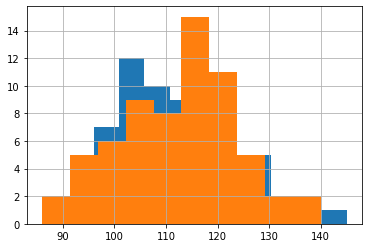

In [11]:
SASdf.TeamPTS.hist()
MEMdf.TeamPTS.hist()

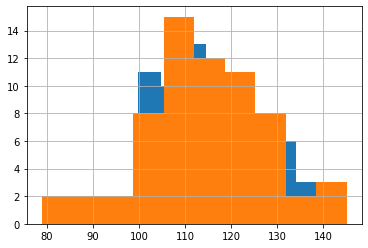

In [12]:
SASdf.OpponentPTS.hist()
MEMdf.OpponentPTS.hist()

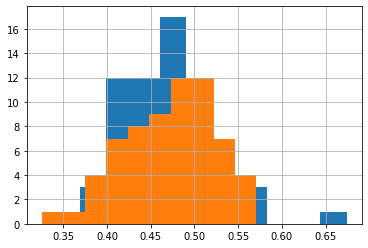

In [13]:
SASdf.TeamFGP.hist()
MEMdf.TeamFGP.hist()

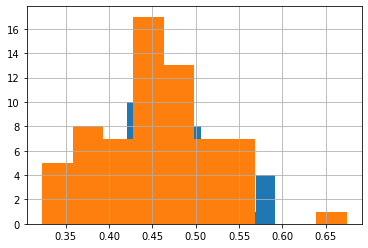

In [14]:
SASdf.OpponentFGP.hist()
MEMdf.OpponentFGP.hist()

In [15]:
SASmeanpts = SASdf.TeamPTS.mean()
MEMmeanpts = MEMdf.TeamPTS.mean()
SASfgp = SASdf.TeamFGP.mean()
MEMfgp = MEMdf.TeamFGP.mean()
SASsdpts = SASdf.TeamPTS.std()
MEMsdpts = MEMdf.TeamPTS.std()

SASmeaMEMp = SASdf.OpponentPTS.mean()
MEMmeaMEMp = MEMdf.OpponentPTS.mean()
SASfgpopp = SASdf.OpponentFGP.mean()
MEMfgpopp = MEMdf.OpponentFGP.mean()
SASsdopp = SASdf.OpponentPTS.std()
MEMsdopp = MEMdf.OpponentPTS.std()

print("SAS Mean ", SASmeanpts)
print("SAS FG% ", SASfgp)
print("SAS Points Standard Deviation ", SASsdpts)
print("MEM Points Mean ", MEMmeanpts)
print("MEM FG% ", MEMfgp)
print("MEM Points Standard Deviation ", MEMsdpts)

print("SAS OppPoints Mean ", SASmeaMEMp)
print("SAS OppFG% Mean ", SASfgpopp)
print("SAS OppPoints SD ", SASsdopp)
print("MEM OppPoints Mean ", MEMmeaMEMp)
print("MEM OppFG% Mean ", MEMfgpopp)
print("MEM OppPoints SD ", MEMsdopp)

SAS Mean  113.15873015873017
SAS FG%  0.471126984126984
SAS Points Standard Deviation  10.724115647735774
MEM Points Mean  112.63076923076923
MEM FG%  0.47172307692307686
MEM Points Standard Deviation  11.37784199492762
SAS OppPoints Mean  114.92063492063492
SAS OppFG% Mean  0.47053968253968254
SAS OppPoints SD  11.045801402462017
MEM OppPoints Mean  113.70769230769231
MEM OppFG% Mean  0.4509538461538461
MEM OppPoints SD  13.12288444488658


In [16]:
def gameSim():
    SASScore = (rnd.gauss(SASmeanpts,SASsdpts)+ rnd.gauss(MEMmeaMEMp,MEMsdopp))/2
    MEMScore = (rnd.gauss(MEMmeanpts,MEMsdpts)+ rnd.gauss(MEMmeaMEMp,MEMsdopp))/2
    if int(round(SASScore)) > int(round(MEMScore)):
        return 1
    elif int(round(SASScore)) < int(round(MEMScore)):
        return -1
    else: return 0

In [17]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('SAS Win ', team1win/(team1win+team2win),'%')
    print('MEM Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [18]:
gAmesSim(10000)

SAS Win  0.5094904064369713 %
MEM Win  0.4905095935630287 %


[1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 